Found 3083 images belonging to 4 classes.
Found 769 images belonging to 4 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                     

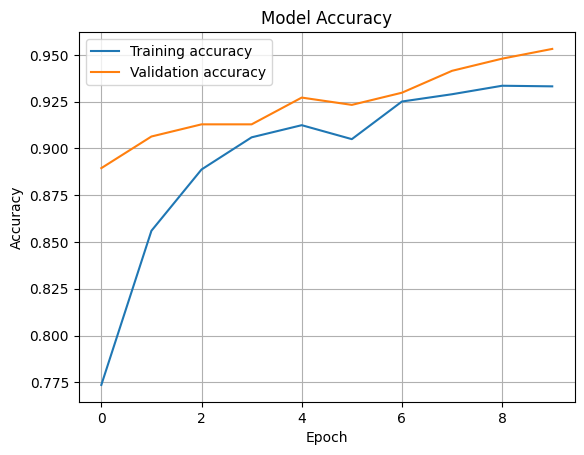

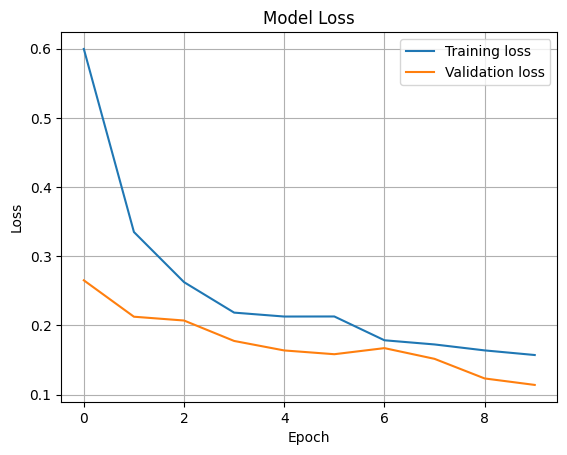

1/1 [==============================] - 0s 202ms/step


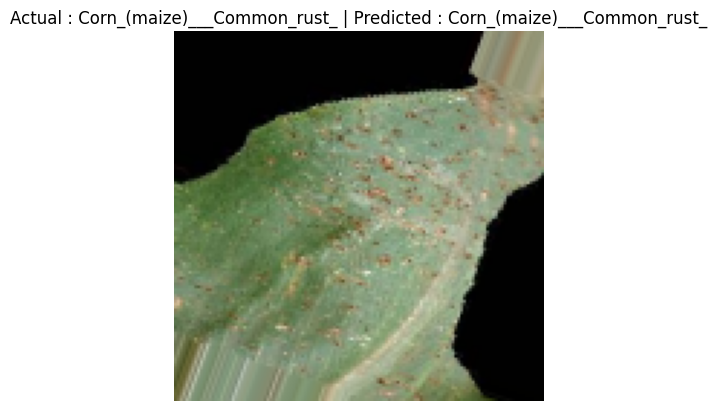

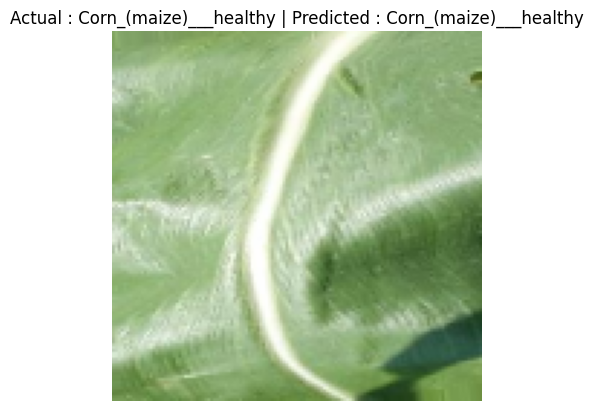

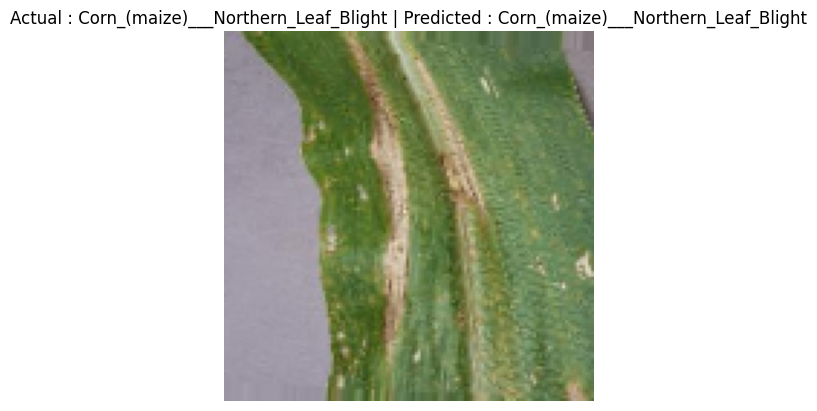

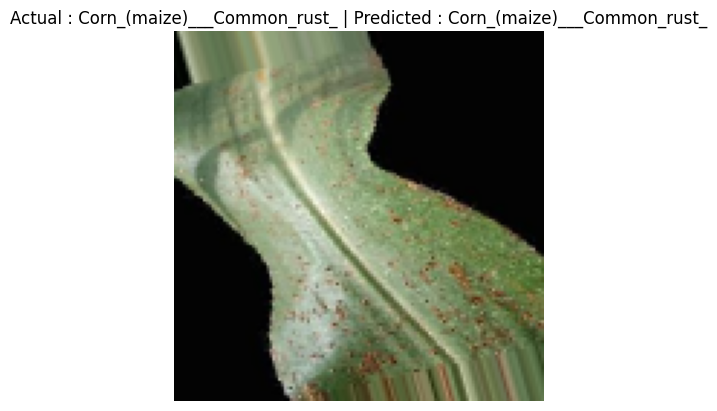

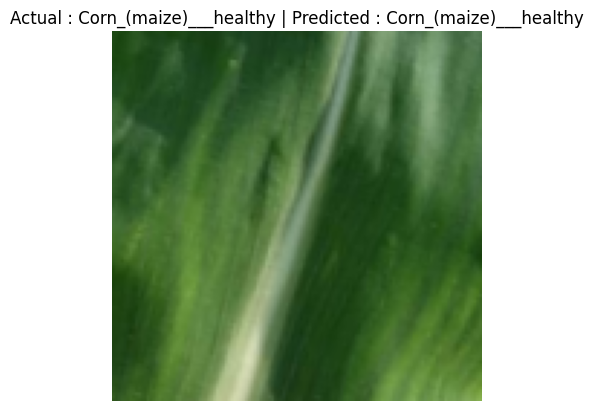

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create ImageDataGenerator instance with validation split
datagen = ImageDataGenerator(rescale = 1./255,
                              validation_split = 0.2,
                              rotation_range = 20,
                              zoom_range = 0.2,
                              horizontal_flip = True)


# Step 2: Create training generator
train_generator = datagen.flow_from_directory(
    'D:/Data Science/Plantdiseasedectection/dataset',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training')

# Step 3: Create validation generator
val_generator = datagen.flow_from_directory(
    'D:/Data Science/Plantdiseasedectection/dataset',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation')
                                                 
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape = (128,128,3)))  # first layer only needs input shape

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Second convolutional layer

model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation = 'relu')) 

model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten()) 

# Fully connected (dense) layer
model.add(Dense(units = 128, activation = 'relu')) 

# Dropout layer to avoid overfitting
model.add(Dropout(0.3))

# Output layer — 4 classes, so use 4 units
model.add(Dense(units = 4, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam',
                        loss ='categorical_crossentropy',
                        metrics = ['accuracy'])

# Model  Summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=10, validation_data= val_generator)

# Model Evaluation
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation accuracy : {val_accuracy:.4f}")

# Plot training & validation accuracy and loss
# Accuracy Plot
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Get a batch from validation generator
X_batch, y_batch = val_generator.next()

# Predict
predictions = model.predict(X_batch)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = np.argmax(y_batch, axis =1)
class_labels = list(val_generator.class_indices.keys())

# Visualize the few predictions
for i in range(5):
    plt.imshow(X_batch[i])
    plt.title(f'Actual : {class_labels[true_classes[i]]} | Predicted : {class_labels[predicted_classes[i]]}')
    plt.axis('off')
    plt.show()